## TODO:

Fix loss function
Fix update function
Fix 

In [1]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

import matplotlib.pyplot as plt

In [2]:
# A helper function to randomly initialize weights and biases
# for a dense neural network layer
def random_layer_params(m, n, key, scale=1e-2):
    w_key, b_key = random.split(key)
    return scale * random.normal(w_key, (n, m)), scale * random.normal(b_key, (n,))

# Initialize all layers for a fully-connected neural network with sizes "sizes"
def init_network_params(sizes, key):
    keys = random.split(key, len(sizes))
    return [random_layer_params(m, n, k) for m, n, k in zip(sizes[:-1], sizes[1:], keys)]

#layer_sizes = [784, 512, 512, 10]
layer_sizes = [1, 28, 28]

step_size = 0.01
num_epochs = 8
batch_size = 128
n_targets = 10
params = init_network_params(layer_sizes, random.PRNGKey(0))

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
params

[(Array([[-0.00875406],
         [-0.00039789],
         [ 0.00645414],
         [-0.00546123],
         [-0.01870203],
         [-0.00391371],
         [-0.00725774],
         [-0.02238576],
         [-0.00561767],
         [-0.00068603],
         [-0.01185862],
         [-0.01674873],
         [ 0.00266422],
         [ 0.00839996],
         [-0.01671373],
         [ 0.00613703],
         [ 0.0026518 ],
         [-0.00350238],
         [-0.00240751],
         [-0.0017448 ],
         [ 0.00296059],
         [ 0.00722382],
         [ 0.00345244],
         [-0.00209704],
         [-0.01128182],
         [-0.00186777],
         [ 0.00589955],
         [-0.02921108]], dtype=float32),
  Array([ 0.00622442, -0.00166344,  0.00342354,  0.01528218,  0.01148665,
          0.00242488,  0.00485399,  0.00084952,  0.00813918,  0.00094975,
         -0.01538067, -0.01548636,  0.00676691,  0.00063899, -0.00136238,
         -0.01105061, -0.0024865 , -0.01667044, -0.00939628,  0.01395378,
         -0.005

In [4]:
def relu(x):
    return jnp.maximum(0, x)

def predict(params, inpts):
  # per-example predictions
    activations = inpts
    for w, b in params[:-1]:
        outputs = jnp.dot(w, activations) + b
        activations = relu(outputs)
    final_w, final_b = params[-1]
    pred = jnp.sum(jnp.dot(final_w, activations) + final_b)
    
    return pred

In [5]:
inpts = jnp.linspace(-jnp.pi/2,jnp.pi/2,1000)
measurements = jnp.sin(jnp.linspace(-jnp.pi/2,jnp.pi/2,1000))

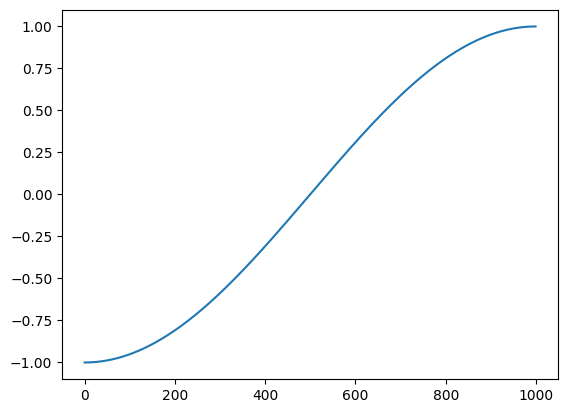

In [6]:
plt.plot(measurements)

In [7]:
predict(params, 5)

Array(-0.67079717, dtype=float32)

In [8]:
import time

batched_predict = vmap(predict, in_axes=(None, 0))

batched_predict(params,jnp.array([0,0.1,0.2]))

Array([-0.66596526, -0.66283923, -0.6605107 ], dtype=float32)

In [9]:
step_size = 0.001

def update(params, x, y):
    grads = grad(loss)(params, x, y)
    return [(w - step_size * dw, b - step_size * db)
        for (w, b), (dw, db) in zip(params, grads)]

def loss(params, inpts, targets):
    preds = batched_predict(params, inpts)
    return -jnp.mean(preds * targets)

[(Array([[-1024.2206 ],
       [ -992.174  ],
       [ 1013.4892 ],
       [-1034.4098 ],
       [-1030.5107 ],
       [-1006.552  ],
       [-1059.0321 ],
       [-1099.2949 ],
       [ 1042.4713 ],
       [-1061.7977 ],
       [-1083.854  ],
       [-1085.5007 ],
       [ 1026.725  ],
       [ 1030.5283 ],
       [-1033.6981 ],
       [-1022.53455],
       [-1038.3793 ],
       [ 1016.42773],
       [ 1040.7133 ],
       [ 1058.9613 ],
       [ 1034.5165 ],
       [ 1050.868  ],
       [ 1046.4193 ],
       [-1044.2235 ],
       [-1049.5963 ],
       [ 1019.5131 ],
       [ 1011.9488 ],
       [-1110.7964 ]], dtype=float32), Array([723.2213 , 723.2213 , 723.2213 , 723.22144, 723.22144, 723.2213 ,
       723.2213 , 723.2213 , 723.2214 , 723.2213 , 723.2215 , 723.2215 ,
       723.2213 , 723.2213 , 723.2213 , 723.2213 , 723.2213 , 723.22144,
       723.22125, 723.22144, 723.22125, 723.22144, 723.2213 , 723.2214 ,
       723.22144, 723.2214 , 723.2213 , 723.2213 ], dtype=float32)), (Arr

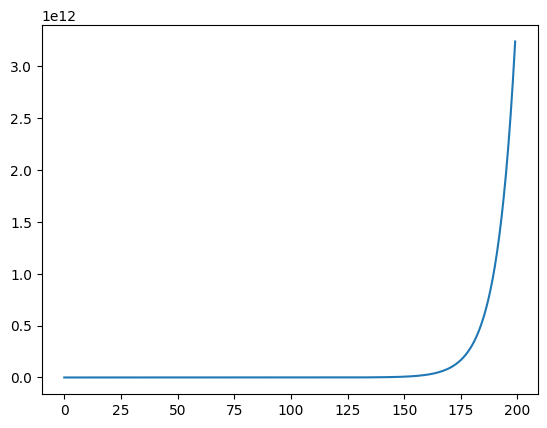

In [10]:
errors = []
TOTAL_ITERS = 200
for i in range(TOTAL_ITERS):
    current_error = jnp.sum(jnp.abs(batched_predict(params,inpts)-measurements))
    errors.append(current_error)
    params=update(params,inpts,measurements)
    

plt.plot(errors)
print(params)

In [11]:
params

[(Array([[-1024.2206 ],
         [ -992.174  ],
         [ 1013.4892 ],
         [-1034.4098 ],
         [-1030.5107 ],
         [-1006.552  ],
         [-1059.0321 ],
         [-1099.2949 ],
         [ 1042.4713 ],
         [-1061.7977 ],
         [-1083.854  ],
         [-1085.5007 ],
         [ 1026.725  ],
         [ 1030.5283 ],
         [-1033.6981 ],
         [-1022.53455],
         [-1038.3793 ],
         [ 1016.42773],
         [ 1040.7133 ],
         [ 1058.9613 ],
         [ 1034.5165 ],
         [ 1050.868  ],
         [ 1046.4193 ],
         [-1044.2235 ],
         [-1049.5963 ],
         [ 1019.5131 ],
         [ 1011.9488 ],
         [-1110.7964 ]], dtype=float32),
  Array([723.2213 , 723.2213 , 723.2213 , 723.22144, 723.22144, 723.2213 ,
         723.2213 , 723.2213 , 723.2214 , 723.2213 , 723.2215 , 723.2215 ,
         723.2213 , 723.2213 , 723.2213 , 723.2213 , 723.2213 , 723.22144,
         723.22125, 723.22144, 723.22125, 723.22144, 723.2213 , 723.2214 ,
         72

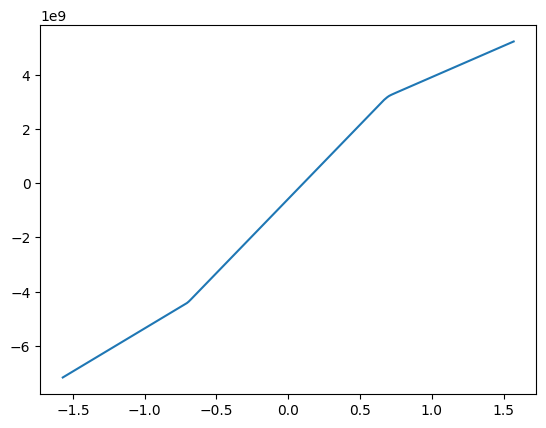

In [12]:
plt.plot(inpts,batched_predict(params,inpts))

In [13]:
batched_predict(params,inpts)

Array([-7.17437850e+09, -7.16439091e+09, -7.15441050e+09, -7.14443878e+09,
       -7.13445376e+09, -7.12446976e+09, -7.11448627e+09, -7.10449766e+09,
       -7.09451520e+09, -7.08452710e+09, -7.07455642e+09, -7.06456832e+09,
       -7.05458381e+09, -7.04460442e+09, -7.03462093e+09, -7.02462822e+09,
       -7.01464525e+09, -7.00466278e+09, -6.99468851e+09, -6.98470195e+09,
       -6.97472102e+09, -6.96474010e+09, -6.95475405e+09, -6.94476442e+09,
       -6.93477581e+09, -6.92479693e+09, -6.91482368e+09, -6.90483763e+09,
       -6.89485158e+09, -6.88487117e+09, -6.87488307e+09, -6.86489498e+09,
       -6.85491200e+09, -6.84492851e+09, -6.83495322e+09, -6.82496922e+09,
       -6.81498726e+09, -6.80500173e+09, -6.79501210e+09, -6.78502656e+09,
       -6.77504461e+09, -6.76507238e+09, -6.75508838e+09, -6.74510387e+09,
       -6.73512192e+09, -6.72513690e+09, -6.71514368e+09, -6.70516122e+09,
       -6.69517978e+09, -6.68520243e+09, -6.67522099e+09, -6.66523750e+09,
       -6.65525658e+09, -

In [14]:
params

[(Array([[-1024.2206 ],
         [ -992.174  ],
         [ 1013.4892 ],
         [-1034.4098 ],
         [-1030.5107 ],
         [-1006.552  ],
         [-1059.0321 ],
         [-1099.2949 ],
         [ 1042.4713 ],
         [-1061.7977 ],
         [-1083.854  ],
         [-1085.5007 ],
         [ 1026.725  ],
         [ 1030.5283 ],
         [-1033.6981 ],
         [-1022.53455],
         [-1038.3793 ],
         [ 1016.42773],
         [ 1040.7133 ],
         [ 1058.9613 ],
         [ 1034.5165 ],
         [ 1050.868  ],
         [ 1046.4193 ],
         [-1044.2235 ],
         [-1049.5963 ],
         [ 1019.5131 ],
         [ 1011.9488 ],
         [-1110.7964 ]], dtype=float32),
  Array([723.2213 , 723.2213 , 723.2213 , 723.22144, 723.22144, 723.2213 ,
         723.2213 , 723.2213 , 723.2214 , 723.2213 , 723.2215 , 723.2215 ,
         723.2213 , 723.2213 , 723.2213 , 723.2213 , 723.2213 , 723.22144,
         723.22125, 723.22144, 723.22125, 723.22144, 723.2213 , 723.2214 ,
         72